In [1]:
import covid19pandas as cod
global_df = cod.get_data_jhu()

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


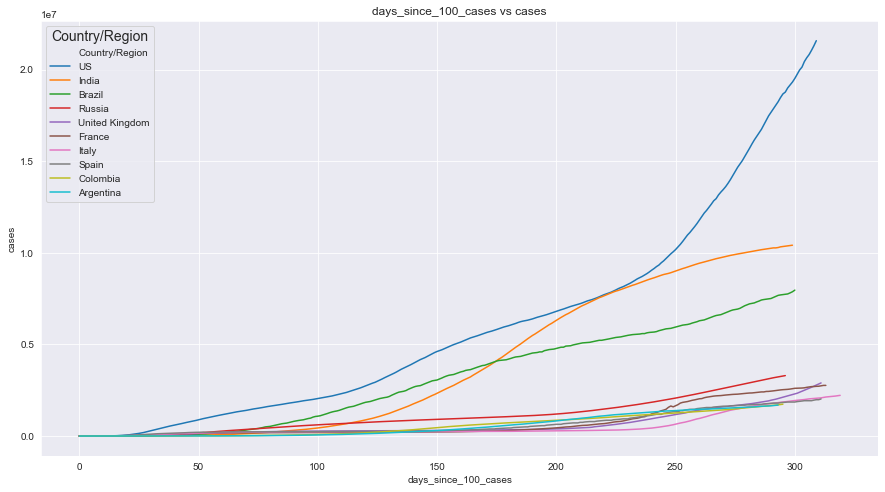

In [2]:
# Top 10
top_ten = cod.select_top_x_regions(
    data=global_df,
    data_col="cases",
    region_cols="Country/Region",
    x=10)

# Chon ca ngay ke tu khi ghi nhan ca nhiem thu 100
with_days_since = cod.calc_days_since_min_count(
    data=top_ten,
    data_col="cases",
    region_cols="Country/Region",
    min_count=100)

# Print the country names on the graph's legend in order of most to least counts 
legend_order = top_ten.sort_values(by=["date", "cases"], ascending=False)["Country/Region"][:10].values

# Make the plot
fig, ax = cod.plot_lines(
    data=with_days_since,
    x_col="days_since_100_cases",
    y_col="cases",
    group_col="Country/Region",
    legend_order=legend_order,
    dimensions=(15, 8))

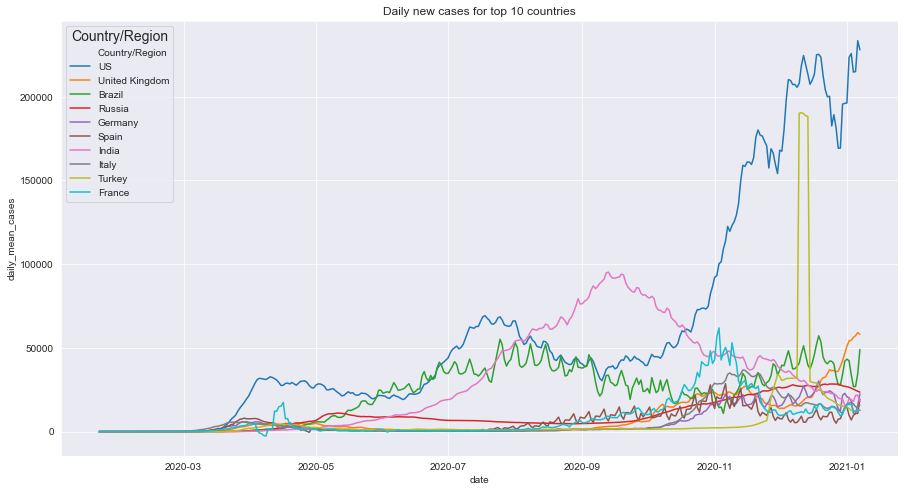

In [3]:
meaned = cod.calc_x_day_rolling_mean(
    data=global_df, data_cols="cases", 
    region_cols=["Country/Region", "Province/State"], 
    x=5)

# Tinh toan su thay doi ve so ca nhiem hang ngay
daily_change = cod.calc_daily_change(
    data=meaned, 
    data_cols="mean_cases", 
    region_cols=["Country/Region", "Province/State"]) 

# Chon top 10 quoc gia
top_ten = cod.select_top_x_regions(
    data=daily_change, 
    data_col="daily_mean_cases", 
    region_cols="Country/Region", x=10) 

legend_order = top_ten.sort_values(by=["date", "daily_mean_cases"], ascending=False)["Country/Region"][:10].values

fig, ax = cod.plot_lines(
    data=top_ten, 
    x_col="date", 
    y_col="daily_mean_cases", 
    group_col="Country/Region", 
    legend_order=legend_order, 
    title="Daily new cases for top 10 countries", 
    dimensions=(15, 8))

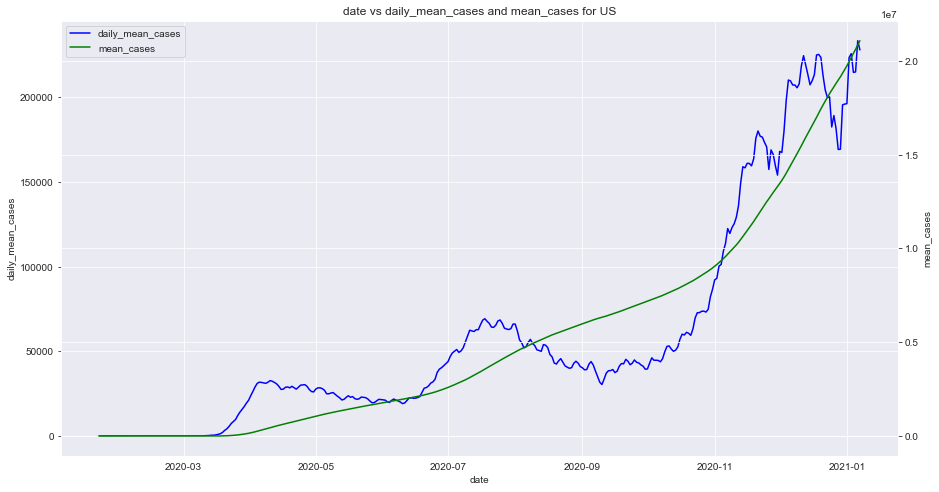

In [4]:
country = "US"
region_group_col = "Country/Region"

country_df = cod.select_regions(
    data=global_df,
    region_col=region_group_col,
    regions=country)

meaned = cod.calc_x_day_rolling_mean(
    data=country_df,
    data_cols="cases",
    region_cols=region_group_col,
    x=5)


with_daily = cod.calc_daily_change(
    data=meaned,
    data_cols="mean_cases",
    region_cols=region_group_col)

fig, ax = cod.plot_lines_two_y(
    data=with_daily,
    x_col="date",
    y1_col="daily_mean_cases",
    y2_col="mean_cases",
    title=f"date vs daily_mean_cases and mean_cases for {country}",
    dimensions=(15, 8))

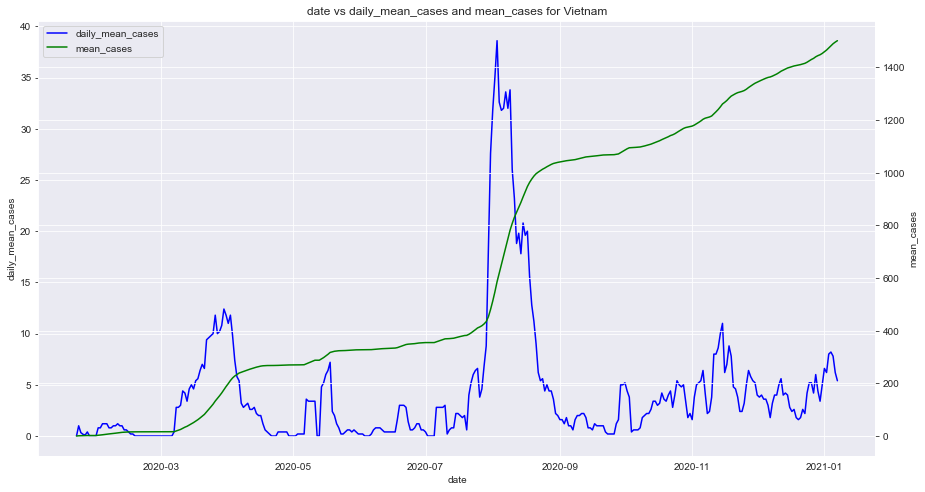

In [5]:
country = "Vietnam"
region_group_col = "Country/Region"

country_df = cod.select_regions(
    data=global_df,
    region_col=region_group_col,
    regions=country)

meaned = cod.calc_x_day_rolling_mean(
    data=country_df,
    data_cols="cases",
    region_cols=region_group_col,
    x=5)

with_daily = cod.calc_daily_change(
    data=meaned,
    data_cols="mean_cases",
    region_cols=region_group_col)

fig, ax = cod.plot_lines_two_y(
    data=with_daily,
    x_col="date",
    y1_col="daily_mean_cases",
    y2_col="mean_cases",
    title=f"date vs daily_mean_cases and mean_cases for {country}",
    dimensions=(15, 8))

In [1]:
pip install covid19pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
import covid19pandas as cod

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import datetime

In [11]:
country = "US"
data_type = "cases"

data = cod.get_data_jhu(data_type=data_type)
data = data[data["Country/Region"] == country]
data = data[["date", data_type]]
data = data.groupby("date").aggregate(np.sum)
data = data.reset_index()
data.head(10)
data.tail(10)

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


,date,cases
339,2020-12-26,18992126
340,2020-12-27,19142603
341,2020-12-28,19309281
342,2020-12-29,19511426
343,2020-12-30,19740772
344,2020-12-31,19968087
345,2021-01-01,20128693
346,2021-01-02,20426184
347,2021-01-03,20636663
348,2021-01-04,20817140


In [12]:
country = "Vietnam"
data_type = "cases"

data = cod.get_data_jhu(data_type=data_type)
data = data[data["Country/Region"] == country] # Chon nhung hang chua thong tin quoc gia ma ta tim  kiem
data = data[["date", data_type]]
data = data.groupby("date").aggregate(np.sum) # Tinh tong so ca nhiem moi ngay tai tat ca cac tinh thanh
data = data.reset_index()
data.head(10)
data.tail(10)

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


,date,cases
339,2020-12-26,1440
340,2020-12-27,1441
341,2020-12-28,1451
342,2020-12-29,1454
343,2020-12-30,1456
344,2020-12-31,1465
345,2021-01-01,1474
346,2021-01-02,1482
347,2021-01-03,1494
348,2021-01-04,1497


In [6]:
df = cod.get_data_jhu()
df.head(5)

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


,date,UID,iso2,iso3,code3,Province/State,Country/Region,Lat,Long,Combined_Key,Population,cases,deaths,recovered
0,2020-01-22,4.0,AF,AFG,4.0,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0,0,0,0
1,2020-01-22,8.0,AL,ALB,8.0,NaN,Albania,41.15330,20.168300,Albania,2877800.0,0,0,0
2,2020-01-22,12.0,DZ,DZA,12.0,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0,0,0,0
3,2020-01-22,20.0,AD,AND,20.0,NaN,Andorra,42.50630,1.521800,Andorra,77265.0,0,0,0
4,2020-01-22,24.0,AO,AGO,24.0,NaN,Angola,-11.20270,17.873900,Angola,32866268.0,0,0,0


In [7]:
df.tail(5)

,date,UID,iso2,iso3,code3,Province/State,Country/Region,Lat,Long,Combined_Key,Population,cases,deaths,recovered
96091,2021-01-07,704.0,VN,VNM,704.0,NaN,Vietnam,14.058324,108.277199,Vietnam,97338583.0,1509,35,1353
96092,2021-01-07,275.0,PS,PSE,275.0,NaN,West Bank and Gaza,31.952200,35.233200,WestBankandGaza,5101416.0,145252,1536,127495
96093,2021-01-07,887.0,YE,YEM,887.0,NaN,Yemen,15.552727,48.516388,Yemen,29825968.0,2104,610,1405
96094,2021-01-07,894.0,ZM,ZMB,894.0,NaN,Zambia,-13.133897,27.849332,Zambia,18383956.0,24297,423,19980
96095,2021-01-07,716.0,ZW,ZWE,716.0,NaN,Zimbabwe,-19.015438,29.154857,Zimbabwe,14862927.0,18675,446,12083


In [8]:
df = cod.get_data_jhu(format="wide", data_type="cases")
df.head(10)

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


,UID,iso2,iso3,code3,Province/State,Country/Region,Lat,Long,Combined_Key,Population,...,2020-12-29 00:00:00,2020-12-30 00:00:00,2020-12-31 00:00:00,2021-01-01 00:00:00,2021-01-02 00:00:00,2021-01-03 00:00:00,2021-01-04 00:00:00,2021-01-05 00:00:00,2021-01-06 00:00:00,2021-01-07 00:00:00
0,4.0,AF,AFG,4.0,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0,...,51350,51405,51526,51526,51526,51526,53011,53105,53105,53207
1,8.0,AL,ALB,8.0,NaN,Albania,41.15330,20.168300,Albania,2877800.0,...,57146,57727,58316,58316,58991,59438,59623,60283,61008,61705
2,12.0,DZ,DZA,12.0,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0,...,98988,99311,99610,99897,100159,100408,100645,100873,101120,101382
3,20.0,AD,AND,20.0,NaN,Andorra,42.50630,1.521800,Andorra,77265.0,...,7919,7983,8049,8117,8166,8192,8249,8308,8348,8348
4,24.0,AO,AGO,24.0,NaN,Angola,-11.20270,17.873900,Angola,32866268.0,...,17371,17433,17553,17568,17608,17642,17684,17756,17864,17974
5,28.0,AG,ATG,28.0,NaN,Antigua and Barbuda,17.06080,-61.796400,AntiguaandBarbuda,97928.0,...,158,158,159,159,159,160,160,160,163,163
6,32.0,AR,ARG,32.0,NaN,Argentina,-38.41610,-63.616700,Argentina,45195777.0,...,1602163,1613928,1625514,1629594,1634834,1640718,1648940,1662730,1676171,1690006
7,51.0,AM,ARM,51.0,NaN,Armenia,40.06910,45.038200,Armenia,2963234.0,...,158296,158878,159409,159738,159798,160027,160220,160544,160853,161054
8,3601.0,AU,AUS,36.0,Australian Capital Territory,Australia,-35.47350,149.012400,"AustralianCapitalTerritory,Australia",428100.0,...,118,118,118,118,118,118,118,118,118,118
9,3602.0,AU,AUS,36.0,New South Wales,Australia,-33.86880,151.209300,"NewSouthWales,Australia",8118000.0,...,4906,4923,4928,4947,4958,4965,4973,4978,4984,4995


In [9]:
df.tail(10)

,UID,iso2,iso3,code3,Province/State,Country/Region,Lat,Long,Combined_Key,Population,...,2020-12-29 00:00:00,2020-12-30 00:00:00,2020-12-31 00:00:00,2021-01-01 00:00:00,2021-01-02 00:00:00,2021-01-03 00:00:00,2021-01-04 00:00:00,2021-01-05 00:00:00,2021-01-06 00:00:00,2021-01-07 00:00:00
262,826.0,GB,GBR,826.0,NaN,United Kingdom,55.378100,-3.436000,UnitedKingdom,67886004.0,...,2382865,2432888,2488780,2542065,2599789,2654779,2713563,2774479,2836801,2889419
263,858.0,UY,URY,858.0,NaN,Uruguay,-32.522800,-55.765800,Uruguay,3473727.0,...,17962,18480,19119,19753,20275,20823,21426,22104,23048,23807
264,860.0,UZ,UZB,860.0,NaN,Uzbekistan,41.377491,64.585262,Uzbekistan,33469199.0,...,76907,76985,77060,77182,77182,77258,77258,77295,77350,77412
265,548.0,VU,VUT,548.0,NaN,Vanuatu,-15.376700,166.959200,Vanuatu,292680.0,...,1,1,1,1,1,1,1,1,1,1
266,862.0,VE,VEN,862.0,NaN,Venezuela,6.423800,-66.589700,Venezuela,28435943.0,...,112861,113121,113558,113884,114083,114230,114407,114662,114908,115322
267,704.0,VN,VNM,704.0,NaN,Vietnam,14.058324,108.277199,Vietnam,97338583.0,...,1454,1456,1465,1474,1482,1494,1497,1504,1505,1509
268,275.0,PS,PSE,275.0,NaN,West Bank and Gaza,31.952200,35.233200,WestBankandGaza,5101416.0,...,135459,136736,138004,139223,140287,141219,142228,143169,144257,145252
269,887.0,YE,YEM,887.0,NaN,Yemen,15.552727,48.516388,Yemen,29825968.0,...,2096,2097,2099,2101,2101,2101,2101,2101,2102,2104
270,894.0,ZM,ZMB,894.0,NaN,Zambia,-13.133897,27.849332,Zambia,18383956.0,...,20177,20462,20725,20997,21230,21582,21993,22645,23495,24297
271,716.0,ZW,ZWE,716.0,NaN,Zimbabwe,-19.015438,29.154857,Zimbabwe,14862927.0,...,13325,13625,13867,14084,14491,15265,15829,17194,17804,18675


In [12]:
df = cod.get_data_jhu(region="us")
df.head(10)

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


,date,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long,Combined_Key,Population,cases,deaths
0,2020-01-22,84001001.0,US,USA,840.0,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga,Alabama,US",55869.0,0,0
1,2020-01-22,84001003.0,US,USA,840.0,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin,Alabama,US",223234.0,0,0
2,2020-01-22,84001005.0,US,USA,840.0,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour,Alabama,US",24686.0,0,0
3,2020-01-22,84001007.0,US,USA,840.0,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb,Alabama,US",22394.0,0,0
4,2020-01-22,84001009.0,US,USA,840.0,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount,Alabama,US",57826.0,0,0
5,2020-01-22,84001011.0,US,USA,840.0,1011.0,Bullock,Alabama,US,32.100305,-85.712655,"Bullock,Alabama,US",10101.0,0,0
6,2020-01-22,84001013.0,US,USA,840.0,1013.0,Butler,Alabama,US,31.753001,-86.680575,"Butler,Alabama,US",19448.0,0,0
7,2020-01-22,84001015.0,US,USA,840.0,1015.0,Calhoun,Alabama,US,33.774837,-85.826304,"Calhoun,Alabama,US",113605.0,0,0
8,2020-01-22,84001017.0,US,USA,840.0,1017.0,Chambers,Alabama,US,32.913601,-85.390727,"Chambers,Alabama,US",33254.0,0,0
9,2020-01-22,84001019.0,US,USA,840.0,1019.0,Cherokee,Alabama,US,34.178060,-85.606390,"Cherokee,Alabama,US",26196.0,0,0


In [13]:
df.tail(10)

,date,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long,Combined_Key,Population,cases,deaths
1175670,2021-01-07,84056031.0,US,USA,840.0,56031.0,Platte,Wyoming,US,42.132991,-104.966331,"Platte,Wyoming,US",8393.0,470,9
1175671,2021-01-07,84056033.0,US,USA,840.0,56033.0,Sheridan,Wyoming,US,44.790489,-106.886239,"Sheridan,Wyoming,US",30485.0,2644,17
1175672,2021-01-07,84056035.0,US,USA,840.0,56035.0,Sublette,Wyoming,US,42.765583,-109.913092,"Sublette,Wyoming,US",9831.0,615,7
1175673,2021-01-07,84056037.0,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater,Wyoming,US",42343.0,3108,24
1175674,2021-01-07,84056039.0,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton,Wyoming,US",23464.0,2260,4
1175675,2021-01-07,84056041.0,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta,Wyoming,US",20226.0,1668,8
1175676,2021-01-07,84090056.0,US,USA,840.0,90056.0,Unassigned,Wyoming,US,NaN,NaN,"Unassigned,Wyoming,US",NaN,0,0
1175677,2021-01-07,84056043.0,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie,Wyoming,US",7805.0,794,21
1175678,2021-01-07,84056045.0,US,USA,840.0,56045.0,Weston,Wyoming,US,43.839612,-104.567488,"Weston,Wyoming,US",6927.0,483,4
1175679,2021-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yakutat,Alaska,US",NaN,59,1


In [14]:
df = cod.get_data_jhu(update=True)
df.head(10)

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


,date,UID,iso2,iso3,code3,Province/State,Country/Region,Lat,Long,Combined_Key,Population,cases,deaths,recovered
0,2020-01-22,4.0,AF,AFG,4.0,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0,0,0,0
1,2020-01-22,8.0,AL,ALB,8.0,NaN,Albania,41.15330,20.168300,Albania,2877800.0,0,0,0
2,2020-01-22,12.0,DZ,DZA,12.0,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0,0,0,0
3,2020-01-22,20.0,AD,AND,20.0,NaN,Andorra,42.50630,1.521800,Andorra,77265.0,0,0,0
4,2020-01-22,24.0,AO,AGO,24.0,NaN,Angola,-11.20270,17.873900,Angola,32866268.0,0,0,0
5,2020-01-22,28.0,AG,ATG,28.0,NaN,Antigua and Barbuda,17.06080,-61.796400,AntiguaandBarbuda,97928.0,0,0,0
6,2020-01-22,32.0,AR,ARG,32.0,NaN,Argentina,-38.41610,-63.616700,Argentina,45195777.0,0,0,0
7,2020-01-22,51.0,AM,ARM,51.0,NaN,Armenia,40.06910,45.038200,Armenia,2963234.0,0,0,0
8,2020-01-22,3601.0,AU,AUS,36.0,Australian Capital Territory,Australia,-35.47350,149.012400,"AustralianCapitalTerritory,Australia",428100.0,0,0,0
9,2020-01-22,3602.0,AU,AUS,36.0,New South Wales,Australia,-33.86880,151.209300,"NewSouthWales,Australia",8118000.0,0,0,0


In [16]:
df.tail(10)

,date,UID,iso2,iso3,code3,Province/State,Country/Region,Lat,Long,Combined_Key,Population,cases,deaths,recovered
96086,2021-01-07,826.0,GB,GBR,826.0,NaN,United Kingdom,55.378100,-3.436000,UnitedKingdom,67886004.0,2889419,78508,0
96087,2021-01-07,858.0,UY,URY,858.0,NaN,Uruguay,-32.522800,-55.765800,Uruguay,3473727.0,23807,231,17098
96088,2021-01-07,860.0,UZ,UZB,860.0,NaN,Uzbekistan,41.377491,64.585262,Uzbekistan,33469199.0,77412,615,75759
96089,2021-01-07,548.0,VU,VUT,548.0,NaN,Vanuatu,-15.376700,166.959200,Vanuatu,292680.0,1,0,1
96090,2021-01-07,862.0,VE,VEN,862.0,NaN,Venezuela,6.423800,-66.589700,Venezuela,28435943.0,115322,1052,109364
96091,2021-01-07,704.0,VN,VNM,704.0,NaN,Vietnam,14.058324,108.277199,Vietnam,97338583.0,1509,35,1353
96092,2021-01-07,275.0,PS,PSE,275.0,NaN,West Bank and Gaza,31.952200,35.233200,WestBankandGaza,5101416.0,145252,1536,127495
96093,2021-01-07,887.0,YE,YEM,887.0,NaN,Yemen,15.552727,48.516388,Yemen,29825968.0,2104,610,1405
96094,2021-01-07,894.0,ZM,ZMB,894.0,NaN,Zambia,-13.133897,27.849332,Zambia,18383956.0,24297,423,19980
96095,2021-01-07,716.0,ZW,ZWE,716.0,NaN,Zimbabwe,-19.015438,29.154857,Zimbabwe,14862927.0,18675,446,12083


In [17]:
global_df = cod.get_data_jhu()
global_df = global_df[["date", "Country/Region", "Province/State", "Combined_Key", "cases", "deaths", "recovered"]]
global_df.tail()

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


,date,Country/Region,Province/State,Combined_Key,cases,deaths,recovered
96091,2021-01-07,Vietnam,NaN,Vietnam,1509,35,1353
96092,2021-01-07,West Bank and Gaza,NaN,WestBankandGaza,145252,1536,127495
96093,2021-01-07,Yemen,NaN,Yemen,2104,610,1405
96094,2021-01-07,Zambia,NaN,Zambia,24297,423,19980
96095,2021-01-07,Zimbabwe,NaN,Zimbabwe,18675,446,12083


In [19]:
# So sanh so ca nhiem cua Viet Nam vas Mi
US_Vietnam = cod.select_regions(
    data=global_df,
    region_col="Country/Region",
    regions=["US", "Vietnam"])

US_Vietnam.head(20)

,date,Country/Region,Province/State,Combined_Key,cases,deaths,recovered
249,2020-01-22,US,NaN,US,1,0,0
268,2020-01-22,Vietnam,NaN,Vietnam,0,0,0
522,2020-01-23,US,NaN,US,1,0,0
541,2020-01-23,Vietnam,NaN,Vietnam,2,0,0
795,2020-01-24,US,NaN,US,2,0,0
814,2020-01-24,Vietnam,NaN,Vietnam,2,0,0
1068,2020-01-25,US,NaN,US,2,0,0
1087,2020-01-25,Vietnam,NaN,Vietnam,2,0,0
1341,2020-01-26,US,NaN,US,5,0,0
1360,2020-01-26,Vietnam,NaN,Vietnam,2,0,0


In [20]:
US_Vietnam.tail(20)

,date,Country/Region,Province/State,Combined_Key,cases,deaths,recovered
93615,2020-12-29,US,NaN,US,19514313,338722,0
93634,2020-12-29,Vietnam,NaN,Vietnam,1454,35,1319
93888,2020-12-30,US,NaN,US,19745497,342459,0
93907,2020-12-30,Vietnam,NaN,Vietnam,1456,35,1323
94161,2020-12-31,US,NaN,US,19974564,345859,0
94180,2020-12-31,Vietnam,NaN,Vietnam,1465,35,1325
94434,2021-01-01,US,NaN,US,20132054,347894,0
94453,2021-01-01,Vietnam,NaN,Vietnam,1474,35,1325
94707,2021-01-02,US,NaN,US,20433912,350290,0
94726,2021-01-02,Vietnam,NaN,Vietnam,1482,35,1337


In [23]:
top_ten = cod.select_top_x_regions(
    data=global_df,
    data_col="cases",
    region_cols="Country/Region",
    x=10)

top_ten.head(10)

,date,Country/Region,cases
0,2020-01-22,Argentina,0
1,2020-01-22,Brazil,0
2,2020-01-22,Colombia,0
3,2020-01-22,France,0
4,2020-01-22,India,0
5,2020-01-22,Italy,0
6,2020-01-22,Russia,0
7,2020-01-22,Spain,0
8,2020-01-22,US,1
9,2020-01-22,United Kingdom,0


In [24]:
top_ten.tail(10)

,date,Country/Region,cases
3510,2021-01-07,Argentina,1690006
3511,2021-01-07,Brazil,7961673
3512,2021-01-07,Colombia,1737347
3513,2021-01-07,France,2763370
3514,2021-01-07,India,10413417
3515,2021-01-07,Italy,2220361
3516,2021-01-07,Russia,3297833
3517,2021-01-07,Spain,2024904
3518,2021-01-07,US,21574043
3519,2021-01-07,United Kingdom,2898052


In [26]:
top_ten_all_data = cod.select_top_x_regions(
    data=global_df,
    data_col="cases",
    region_cols="Country/Region",
    x=10,
    other_data_cols=["deaths", "recovered"])

top_ten_all_data.head(10)

,date,Country/Region,cases,deaths,recovered
0,2020-01-22,Argentina,0,0,0
1,2020-01-22,Brazil,0,0,0
2,2020-01-22,Colombia,0,0,0
3,2020-01-22,France,0,0,0
4,2020-01-22,India,0,0,0
5,2020-01-22,Italy,0,0,0
6,2020-01-22,Russia,0,0,0
7,2020-01-22,Spain,0,0,0
8,2020-01-22,US,1,0,0
9,2020-01-22,United Kingdom,0,0,0


In [27]:
top_ten_all_data.tail(10)

,date,Country/Region,cases,deaths,recovered
3510,2021-01-07,Argentina,1690006,44122,1484794
3511,2021-01-07,Brazil,7961673,200498,7081521
3512,2021-01-07,Colombia,1737347,45067,1580285
3513,2021-01-07,France,2763370,66700,204680
3514,2021-01-07,India,10413417,150570,10037398
3515,2021-01-07,Italy,2220361,77291,1572015
3516,2021-01-07,Russia,3297833,59628,2681373
3517,2021-01-07,Spain,2024904,51675,150376
3518,2021-01-07,US,21574043,365208,0
3519,2021-01-07,United Kingdom,2898052,78632,6520


In [29]:
#data: Khung dữ liệu để tính toán.
#data_cols: Tên của các cột dữ liệu để tính toán có nghĩa. Chuyển một tên cột hoặc một danh sách.
#region_cols: Cột hoặc các cột được yêu cầu để xác định duy nhất từng hàng cho mỗi ngày
#x:Số ngày sử dụng cho mỗi giá trị trung bình.

means_3_days = cod.calc_x_day_rolling_mean(
    data=global_df,
    data_cols=["cases", "deaths", "recovered"],
    region_cols=["Combined_Key"],
    x=3)

means_3_days.head(20)

,date,Country/Region,Province/State,Combined_Key,cases,deaths,recovered,mean_cases,mean_deaths,mean_recovered
0,2020-01-22,Afghanistan,NaN,Afghanistan,0,0,0,0.0,0.0,0.0
1,2020-01-22,Albania,NaN,Albania,0,0,0,0.0,0.0,0.0
2,2020-01-22,Algeria,NaN,Algeria,0,0,0,0.0,0.0,0.0
3,2020-01-22,Andorra,NaN,Andorra,0,0,0,0.0,0.0,0.0
4,2020-01-22,Angola,NaN,Angola,0,0,0,0.0,0.0,0.0
5,2020-01-22,Antigua and Barbuda,NaN,AntiguaandBarbuda,0,0,0,0.0,0.0,0.0
6,2020-01-22,Argentina,NaN,Argentina,0,0,0,0.0,0.0,0.0
7,2020-01-22,Armenia,NaN,Armenia,0,0,0,0.0,0.0,0.0
8,2020-01-22,Australia,Australian Capital Territory,"AustralianCapitalTerritory,Australia",0,0,0,0.0,0.0,0.0
9,2020-01-22,Australia,New South Wales,"NewSouthWales,Australia",0,0,0,0.0,0.0,0.0


In [30]:
means_3_days.tail(20)

,date,Country/Region,Province/State,Combined_Key,cases,deaths,recovered,mean_cases,mean_deaths,mean_recovered
96076,2021-01-07,United Kingdom,Anguilla,"Anguilla,UnitedKingdom",15,0,13,1.500000e+01,0.000000,13.000000
96077,2021-01-07,United Kingdom,Bermuda,"Bermuda,UnitedKingdom",636,11,531,6.333333e+02,11.000000,525.000000
96078,2021-01-07,United Kingdom,British Virgin Islands,"BritishVirginIslands,UnitedKingdom",97,1,84,9.700000e+01,1.000000,84.000000
96079,2021-01-07,United Kingdom,Cayman Islands,"CaymanIslands,UnitedKingdom",359,2,310,3.550000e+02,2.000000,307.333333
96080,2021-01-07,United Kingdom,Channel Islands,"ChannelIslands,UnitedKingdom",3210,67,2756,3.189333e+03,67.000000,2756.000000
96081,2021-01-07,United Kingdom,Falkland Islands (Malvinas),"FalklandIslands(Malvinas),UnitedKingdom",29,0,27,2.900000e+01,0.000000,23.666667
96082,2021-01-07,United Kingdom,Gibraltar,"Gibraltar,UnitedKingdom",2928,11,1639,2.784000e+03,10.666667,1582.666667
96083,2021-01-07,United Kingdom,Isle of Man,"IsleofMan,UnitedKingdom",390,25,349,3.883333e+02,25.000000,349.000000
96084,2021-01-07,United Kingdom,Montserrat,"Montserrat,UnitedKingdom",13,1,12,1.300000e+01,1.000000,12.000000
96085,2021-01-07,United Kingdom,Turks and Caicos Islands,"TurksandCaicosIslands,UnitedKingdom",956,6,799,9.383333e+02,6.000000,797.666667
